<h1> Project

In [1]:
import pandas as pd #type:ignore
import numpy as np #type:ignore
from datetime import timedelta

In [2]:
location = "data/weatherAUS.csv"

df= pd.read_csv(location)

display(df)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


<h4> Counting before filling

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def print_missing_values():
    plt.figure(figsize=(10,8))
    ax = sns.barplot(df.isna().sum() / df.shape[0] * 100);
    plt.title('Missing values by column');
    plt.xticks(rotation=90);

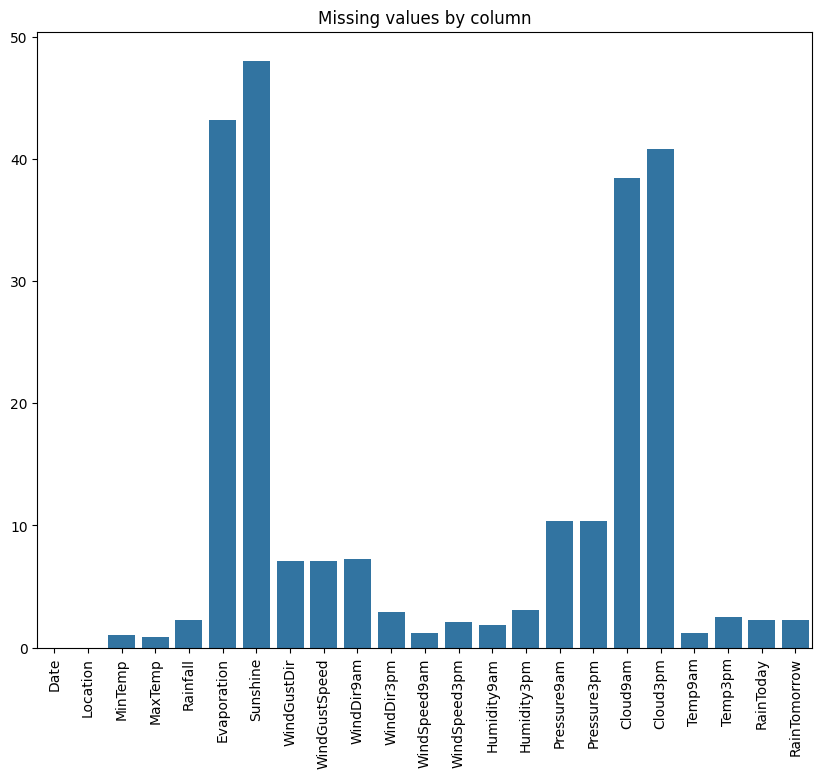

In [4]:
print_missing_values()

<h4> Date transformation

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Month'] = df['Date'].dt.month

<h4> Subcategories creation

In [7]:
location = "data/villes.csv"

villes= pd.read_csv(location, sep=';')

display(villes)

,Ville,Etat,Climat
0,Albany,Australie Occidentale,Tempéré
1,AliceSprings,Australie Occidentale,Aride
2,PearceRAAF,Australie Occidentale,Tempéré
3,Perth,Australie Occidentale,Tempéré
4,PerthAirport,Australie Occidentale,Tempéré
5,SalmonGums,Australie Occidentale,Tempéré
6,Walpole,Australie Occidentale,Tempéré
7,Witchcliffe,Australie Occidentale,Tempéré
8,MountGambier,Australie-Meridionale,Tempéré
9,Nuriootpa,Australie-Meridionale,Tempéré


In [8]:
villes['Climat'] = villes['Climat'].replace({"Désert": "Aride"})

In [9]:
villes['Climat'].unique()

array(['Tempéré', 'Aride', 'Subtropical', 'Tropical'], dtype=object)

In [10]:
df = pd.merge(left=df, right=villes, how='left', left_on='Location', right_on='Ville').drop(columns=['Ville', 'Etat'])

df.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Climat
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12,Tempéré
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12,Tempéré
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12,Tempéré
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12,Tempéré
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12,Tempéré
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No,12,Tempéré
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No,12,Tempéré
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No,12,Tempéré
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes,12,Tempéré
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No,12,Tempéré


In [11]:
agg_dictionary = {'MinTemp': 'mean',
                  'MaxTemp': 'mean',
                  'Rainfall': 'mean',
                  'Humidity3pm': 'mean',
                  'Temp9am': 'mean',
                  'Temp3pm': 'mean'}

df_completer = df.groupby(['Climat', 'Date']).agg(agg_dictionary).reset_index()

df_completer

,Climat,Date,MinTemp,MaxTemp,Rainfall,Humidity3pm,Temp9am,Temp3pm
0,Aride,2008-12-01,19.600,37.600000,0.00,16.00,30.400,37.200
1,Aride,2008-12-02,21.000,39.100000,1.20,13.00,32.500,38.200
2,Aride,2008-12-03,22.900,40.900000,0.00,11.00,35.000,40.400
3,Aride,2008-12-04,24.700,40.500000,0.00,24.00,32.300,36.500
4,Aride,2008-12-05,23.400,32.400000,0.20,43.00,26.800,31.100
...,...,...,...,...,...,...,...,...
12857,Tropical,2017-06-21,10.660,24.780000,0.08,51.75,14.420,21.950
12858,Tropical,2017-06-22,10.160,24.600000,0.04,47.50,15.220,21.825
12859,Tropical,2017-06-23,11.060,25.040000,0.24,50.25,15.880,22.175
12860,Tropical,2017-06-24,10.920,22.475000,0.28,55.50,15.340,20.525


<h4> MinTemp / MaxTemp / Temp9am / Temp3pm

In [12]:
def get_mean_value(column:str, date, climat, range_days=3):
    date_min = date - timedelta(days=range_days)
    date_max = date + timedelta(days=range_days)
    ans = df_completer[ (df_completer['Climat'] == climat) 
                        & (df_completer['Date'] >= date_min)
                        & (df_completer['Date'] <= date_max)][column].mean()

    return ans

In [13]:
columns_temp = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']

In [14]:
for column in columns_temp:
    print(f"Filling column {column}")
    index_na = df[column].isna()
    print(f"There are {df[column].isna().sum()} missing values before filling")
    df.loc[index_na, column] = df[index_na].apply(lambda x: get_mean_value(column, x['Date'], x['Climat']), axis=1)
    print(f"There are {df[column].isna().sum()} after filling")

Filling column MinTemp
There are 1485 missing values before filling
There are 0 after filling
Filling column MaxTemp
There are 1261 missing values before filling
There are 0 after filling
Filling column Temp9am
There are 1767 missing values before filling
There are 0 after filling
Filling column Temp3pm
There are 3609 missing values before filling
There are 0 after filling


<h4> Rainfall

In [15]:
def get_median_value(column:str, date, climat, range_days=3):
    date_min = date - timedelta(days=range_days)
    date_max = date + timedelta(days=range_days)
    ans = df_completer[ (df_completer['Climat'] == climat) 
                        & (df_completer['Date'] >= date_min)
                        & (df_completer['Date'] <= date_max)][column].median()

    return ans

In [16]:
#Setting column
column = 'Rainfall'
print(f"Filling column {column}")

#Counting missing values
index_na = df[column].isna()
print(f"There are {df[column].isna().sum()} missing values before filling")

#Filling missing values
df.loc[index_na, column] = df[index_na].apply(lambda x: 0 if x['RainToday'] == 0 else get_median_value(column, x['Date'], x['Climat']), axis=1)
print(f"There are {df[column].isna().sum()} after filling")


Filling column Rainfall
There are 3261 missing values before filling
There are 0 after filling


<h4> WindGustSpeed / Dir

In [17]:
#Setting columns
column = 'WindGustSpeed'
#columns_to_compare = ['WindSpeed9am', 'WindSpeed3pm']
print(f"Filling column {column}")

#Counting missing values
index_na = df[column].isna()
print(f"There are {df[column].isna().sum()} missing values before filling")

#Filling missing values
df.loc[index_na, column] = df[index_na].apply(lambda x: max(x['WindSpeed9am'], x['WindSpeed3pm']), axis=1)
print(f"There are {df[column].isna().sum()} after filling")


Filling column WindGustSpeed
There are 10263 missing values before filling
There are 1403 after filling


In [18]:
#Setting columns
column = 'WindGustDir'
#columns_to_compare = ['WindSpeed9am', 'WindSpeed3pm']
print(f"Filling column {column}")

#Counting missing values
index_na = df[column].isna()
print(f"There are {df[column].isna().sum()} missing values before filling")

#Filling missing values
df.loc[index_na, column] = df.loc[index_na, 'WindDir3pm']
print(f"There are {df[column].isna().sum()} after filling")


Filling column WindGustDir
There are 10326 missing values before filling
There are 3258 after filling


<h4> Humidity

In [19]:
#Setting column
column = 'Humidity3pm'
print(f"Filling column {column}")

#Counting missing values
index_na = df[column].isna()
print(f"There are {df[column].isna().sum()} missing values before filling")

#Filling missing values
df.loc[index_na, column] = df[index_na].apply(lambda x: 100 if x['RainToday'] == 1 else get_median_value(column, x['Date'], x['Climat']), axis=1)
print(f"There are {df[column].isna().sum()} after filling")

Filling column Humidity3pm
There are 4507 missing values before filling
There are 0 after filling


<h4> RainToday / Tomorrow

In [20]:
df[['RainToday', 'RainTomorrow']] = df[['RainToday', 'RainTomorrow']].replace({'No': 0, 'Yes': 1})
df.head()

C:\Users\sergi\AppData\Local\Temp\ipykernel_17980\78527332.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['RainToday', 'RainTomorrow']] = df[['RainToday', 'RainTomorrow']].replace({'No': 0, 'Yes': 1})


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Climat
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,12,Tempéré
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,12,Tempéré
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,12,Tempéré
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,12,Tempéré
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,12,Tempéré


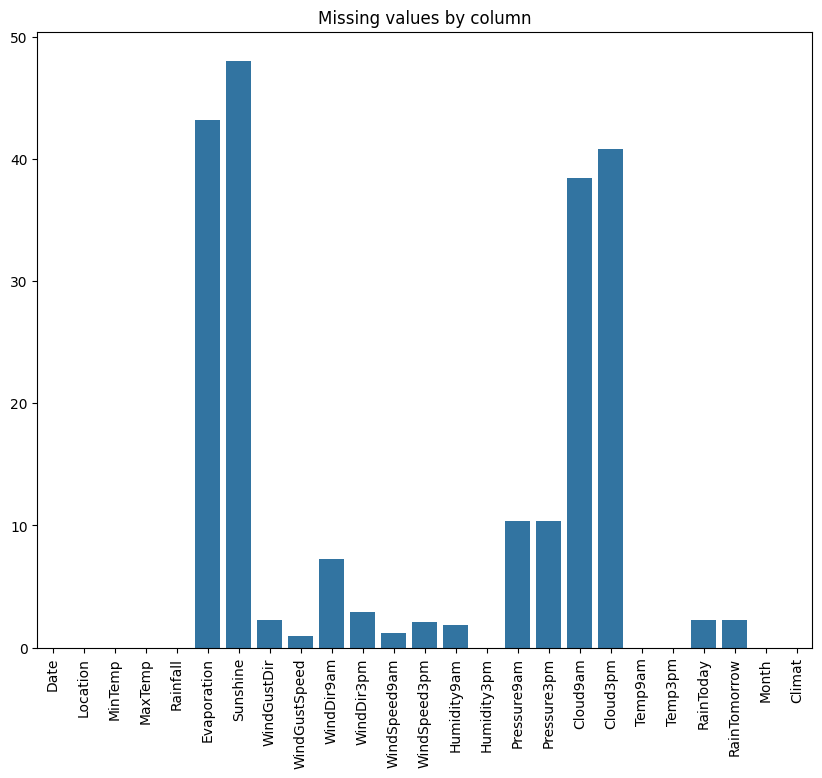

In [21]:
print_missing_values()

<h4> Pressure evaluation

In [22]:
print(df['Pressure9am'].isna().sum())

15065


In [23]:
print(df['Pressure3pm'].isna().sum())

15028


In [24]:
df[(df['Pressure9am'].isna()) & (~df['Pressure3pm'].isna())]['Pressure3pm'].count()

261

In [25]:
df[(df['Pressure3pm'].isna()) & (~df['Pressure9am'].isna())]['Pressure9am'].count()

224

C:\Users\sergi\AppData\Local\Temp\ipykernel_17980\50341975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pressure['Diff'] = df_pressure['Pressure3pm'] - df_pressure['Pressure9am']


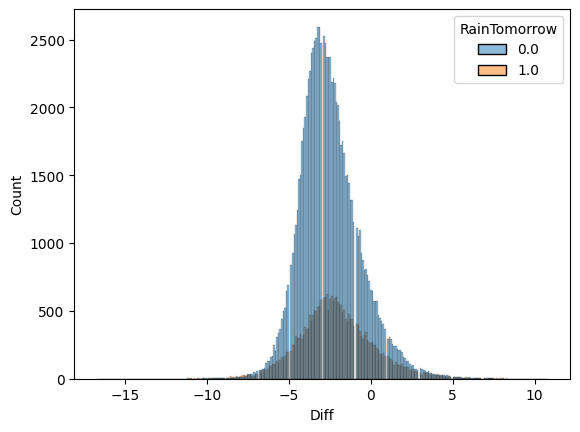

In [26]:
df_pressure = df[['Pressure3pm', 'Pressure9am', 'RainTomorrow']]
df_pressure['Diff'] = df_pressure['Pressure3pm'] - df_pressure['Pressure9am']
df_pressure
sns.histplot(data=df_pressure, x='Diff', hue='RainTomorrow');

In [27]:
(df['Pressure3pm'] - df['Pressure9am']).mean()

-2.3958870101635537

In [28]:
df['Pressure3pm']

0         1007.1
1         1007.8
2         1008.7
3         1012.8
4         1006.0
           ...  
145455    1020.3
145456    1019.1
145457    1016.8
145458    1016.5
145459    1017.9
Name: Pressure3pm, Length: 145460, dtype: float64

In [29]:
df[['Pressure3pm', 'Pressure9am']]

,Pressure3pm,Pressure9am
0,1007.1,1007.7
1,1007.8,1010.6
2,1008.7,1007.6
3,1012.8,1017.6
4,1006.0,1010.8
...,...,...
145455,1020.3,1024.6
145456,1019.1,1023.5
145457,1016.8,1021.0
145458,1016.5,1019.4


<h4> Columns drop

In [30]:
columns_to_drop = ['Date', 'Location', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'WindGustSpeed', 'WindDir9am', 'WindSpeed9am', 'WindSpeed3pm','WindDir3pm', 'Humidity9am']

In [31]:
df = df.drop(columns=columns_to_drop)

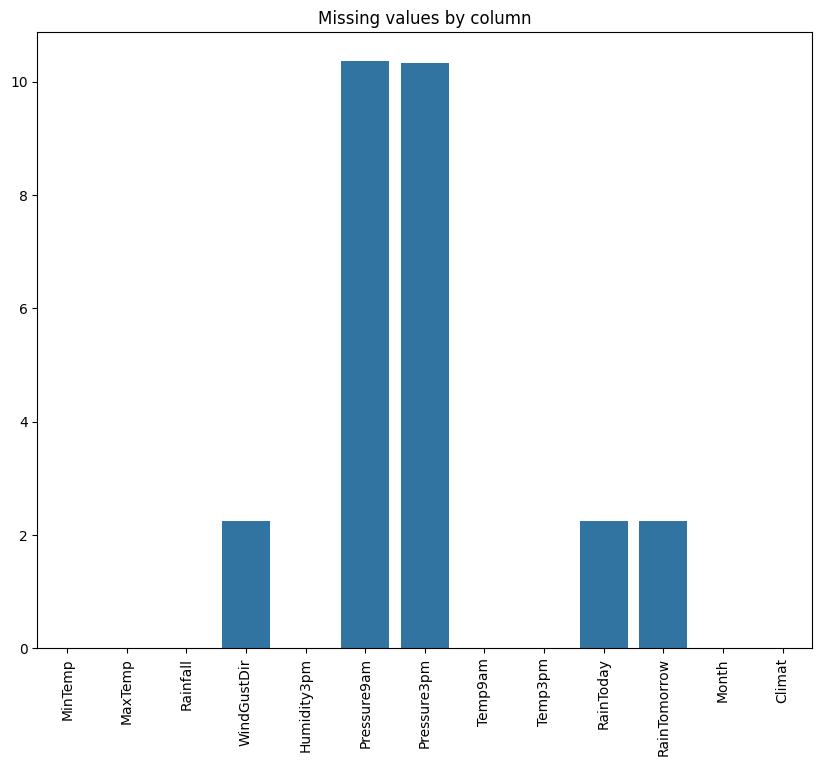

In [32]:
print_missing_values()

In [33]:
original_rows = df.shape[0]
print(f"Rows before drop NA: {original_rows}")
df = df.dropna()

new_rows = df.shape[0]
print(f"Rows after drop NA: {new_rows} ({new_rows/original_rows:.1%})")

Rows before drop NA: 145460
Rows after drop NA: 125921 (86.6%)


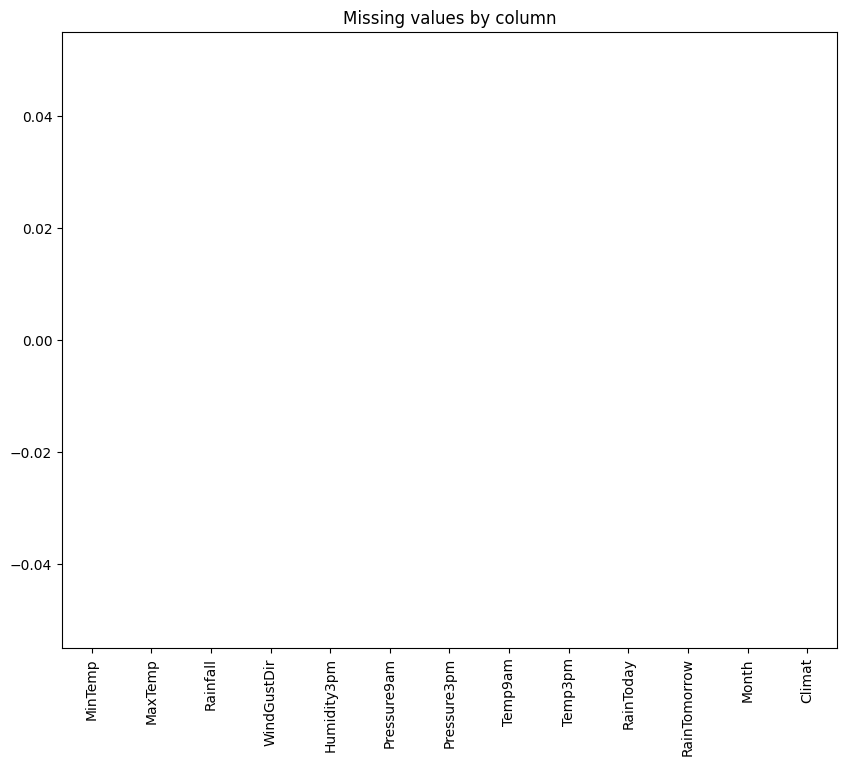

In [34]:
print_missing_values()

In [35]:
print(df.isna().sum().sum())

0


<h4> Category Creations

In [36]:
columns_names = df['Climat'].unique()
columns_names_dict = {name: 'Climat_'+ name for name in columns_names}

df = df.join(pd.get_dummies(df['Climat'], dtype='int')).drop(columns='Climat')

df = df.rename(columns=columns_names_dict)
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Climat_Aride,Climat_Subtropical,Climat_Tempéré,Climat_Tropical
0,13.4,22.9,0.6,W,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,12,0,0,1,0
1,7.4,25.1,0.0,WNW,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,12,0,0,1,0
2,12.9,25.7,0.0,WSW,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,12,0,0,1,0
3,9.2,28.0,0.0,NE,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,12,0,0,1,0
4,17.5,32.3,1.0,W,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,12,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,E,27.0,1024.7,1021.2,9.4,20.9,0.0,0.0,6,1,0,0,0
145455,2.8,23.4,0.0,E,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0,6,1,0,0,0
145456,3.6,25.3,0.0,NNW,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0,6,1,0,0,0
145457,5.4,26.9,0.0,N,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0,6,1,0,0,0


In [37]:
columns_names = df['WindGustDir'].unique()
columns_names_dict = {name: 'WindGustDir_'+ name for name in columns_names}

columns_names_dict

df = df.join(pd.get_dummies(df['WindGustDir'], dtype='int')).drop(columns='WindGustDir')
df = df.rename(columns=columns_names_dict)
df

,MinTemp,MaxTemp,Rainfall,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,22.9,0.6,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,27.0,1024.7,1021.2,9.4,20.9,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


<h4> Save

In [38]:
df.to_csv("data/weatherAUS_Clean.csv")